***Case study #03 - Correlation and regression***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Add_sales_data_2018.csv')
data

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


***1. First of all, check whether there is any relationship between the amount
spent for advertising through five different companies and profit
generated.***

<AxesSubplot:>

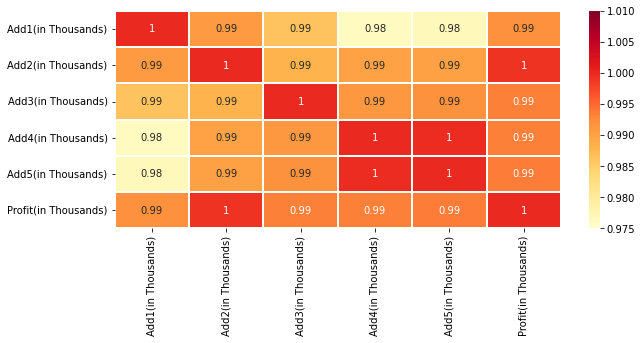

In [3]:
corr=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corr,vmin=.975,vmax=1.01,annot=True,linewidths=0.2,cmap='YlOrRd')

***2. Build a regression model to predict the profit from the given data and
comment your findings on it.***

In [10]:
data1=data.drop(['Date','Add5(in Thousands)'],axis=1)
data1.columns

Index(['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)',
       'Add4(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

In [18]:
y=data1['Profit(in Thousands)']
x=data1.drop(['Profit(in Thousands)'],axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.2)

In [19]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print(y_test)

113    5373.275
170    5728.804
12     4464.110
73     4936.120
145    5108.626
20     4178.008
107    5452.280
8      4425.005
39     4506.279
89     4898.776
82     5034.726
164    4997.719
69     5030.451
165    5107.437
25     4436.321
100    5131.898
135    4979.399
23     4465.950
88     4937.030
192    5767.839
97     4648.834
83     4980.446
24     4435.174
179    6137.800
138    5247.011
200    5374.105
108    5580.775
34     4461.325
98     4569.293
168    5616.791
124    5244.097
161    5212.949
76     5225.140
155    5078.636
118    5318.100
142    5163.322
63     5250.775
54     4671.113
159    5384.175
81     5027.633
80     5043.705
Name: Profit(in Thousands), dtype: float64


In [20]:
print(predictions)

[5373.86268339 5728.41227424 4464.39268161 4935.66681053 5108.54681549
 4177.37128794 5451.96939212 4424.88383197 4506.0328211  4899.29440617
 5034.47426    4996.90069753 5028.11097482 5108.95074039 4436.01015029
 5133.33794785 4979.05882859 4466.26642525 4937.82560621 5767.85632441
 4648.69606482 4980.02429372 4435.95653802 6138.39060803 5247.31904238
 5373.9766178  5581.0002217  4461.05131003 4569.53927164 5617.28065588
 5243.24081602 5213.16655338 5225.34647921 5079.14185184 5317.74981167
 5163.08802338 5250.94504696 4670.79188444 5383.86393159 5027.39833605
 5043.60649383]


In [22]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 0.400022511865798


Lower the MSE, the closer is forecast to actual. This is used as a model evaluation measure for regression models and the lower value indicates a better fit.

***3. Predict the profit generated by the company, if they wish to spend the
following amount for advertisement.
Add1(in Thousands) 290
Add2(in Thousands) 312
Add3(in Thousands) 309
Add4(in Thousands) 298
Add5(in Thousands) 320***

In [23]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [24]:
y_pred_train = model.predict(x_train)

In [25]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_train, y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_train, y_pred_train))

Coefficients: [ 0.95573183 12.45915591  3.55061404  1.81510347]
Intercept: -0.35421895885883714
Mean squared error (MSE): 0.26
Coefficient of determination (R^2): 1.00


In [27]:
yintercept = '%.2f' % model.intercept_
LogP = '%.2f LogP' % model.coef_[0]
MW = '%.4f MW' % model.coef_[1]
RB = '%.4f RB' % model.coef_[2]
AP = '%.2f AP' % model.coef_[3]
print('LogS = ' + 
      ' ' + 
      yintercept + 
      ' ' + 
      LogP + 
      ' ' + 
      MW + 
      ' + ' + 
      RB + 
      ' ' + 
      AP)

LogS =  -0.35 0.96 LogP 12.4592 MW + 3.5506 RB 1.82 AP


In [30]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [32]:
df2 = {'Add1(in Thousands)': 290, 'Add2(in Thousands)': 312, 'Add3(in Thousands)': 309,'Add4(in Thousands)':298,'Add5(in Thousands)':320}
df = data.append(df2, ignore_index = True)
df.tail(5)

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444
204,2017-12-08,287.55,289.90,285.05,288.05,288.45,5421.842
205,NaN,290.00,312.00,309.00,298.00,320.00,NaN


In [37]:
y=df['Profit(in Thousands)']
x=df.drop(['Profit(in Thousands)','Date'],axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [38]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print(y_test)

52     4494.144
182    5956.323
5      4404.686
18     4190.965
189    5938.474
171    5792.175
76     5225.140
154    5017.503
104    5518.561
33     4513.600
12     4464.110
129    5140.372
55     4760.877
66     5038.222
45     4606.340
168    5616.791
130    4922.845
7      4470.775
37     4480.363
152    5065.652
80     5043.705
111    5491.792
131    4968.030
205         NaN
180    6101.648
138    5247.011
156    5137.534
113    5373.275
161    5212.949
89     4898.776
184    5962.336
194    5717.838
125    5153.977
188    5880.541
92     4763.690
16     4175.677
190    5917.925
136    4915.682
22     4523.704
74     5113.337
44     4648.627
4      4350.683
Name: Profit(in Thousands), dtype: float64


In [39]:
print(predictions)

[4494.144 5956.323 4404.686 4190.965 5938.474 5792.175 5225.14  5017.503
 5518.561 4513.6   4464.11  5140.372 4760.877 5038.222 4606.34  5616.791
 4922.845 4470.775 4480.363 5065.652 5043.705 5491.792 4968.03  5820.06
 6101.648 5247.011 5137.534 5373.275 5212.949 4898.776 5962.336 5717.838
 5153.977 5880.541 4763.69  4175.677 5917.925 4915.682 4523.704 5113.337
 4648.627 4350.683]


In [41]:
df_scores_comp = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df_scores_comp

,Actual,Predicted
52,4494.144,4494.144
182,5956.323,5956.323
5,4404.686,4404.686
18,4190.965,4190.965
189,5938.474,5938.474
171,5792.175,5792.175
76,5225.140,5225.140
154,5017.503,5017.503
104,5518.561,5518.561
33,4513.600,4513.600


With the given data- Add1(in Thousands) 290, Add2(in Thousands) 312, Add3(in Thousands) 309, Add4(in Thousands) 298, Add5(in Thousands) 320 - the profit will be profit 5820.060